# Support Vector Machines (SVM): Simulated and real world data examples


## Objective
Compare the performance of linear and RBF SVM classifiers on a binary classification task.

## Methodology
- Data preprocessing and scaling
- Train-test split
- Model training using scikit-learn
- Performance evaluation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Utility to plot decision boundary for 2D data
def plot_decision_boundary(clf, X, y, title=None, ax=None, plot_support=True):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,5))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    if plot_support and hasattr(clf, 'support_vectors_'):
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, marker='x')
    if title:
        ax.set_title(title)
    return ax

## Exercici 1: Influència del paràmetre de regularització C

Entrena una SVM lineal sobre les mateixes dades d'entrenament utilitzant tres valors diferents de C (0,01, 1, 100). Compara els límits de decisió i les precisions de les proves. Explica l'efecte de C.

Linear SVM accuracy on test set: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



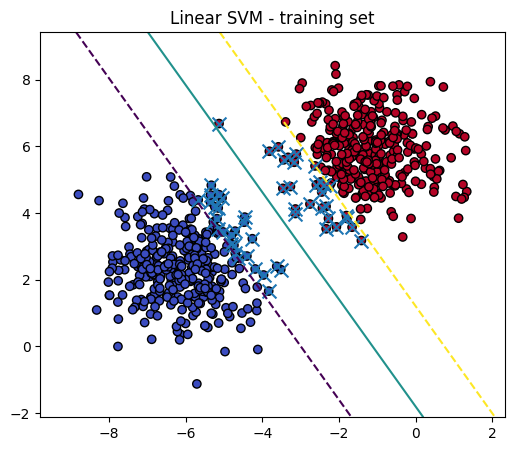

In [3]:
# C = 0.01
# Creem dades sintètiques
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1, random_state=1234)

# Divisió de proves d'entrenament
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Linear SVM (soft margin)
clf_lin = svm.SVC(kernel='linear', C=0.01)
clf_lin.fit(X_train, y_train)
    
# Evaluem
y_pred = clf_lin.predict(X_test)
print('Linear SVM accuracy on test set:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

# Plot del límit de decisió
ax = plot_decision_boundary(clf_lin, X_train, y_train, title='Linear SVM - training set')
plt.show()


Linear SVM accuracy on test set: 0.9966666666666667

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       154
           1       0.99      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



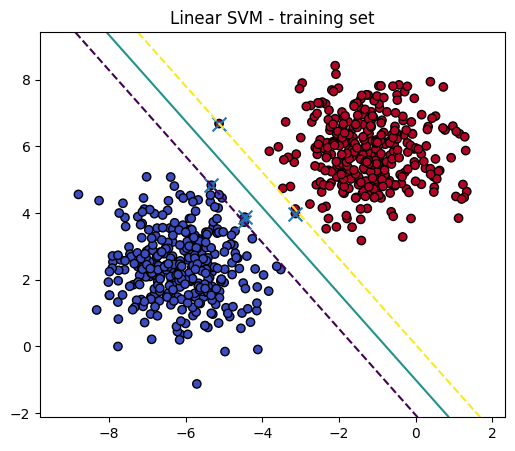

In [4]:
# C = 1
# Creem dades sintètiques
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1, random_state=1234)

# Divisió de proves d'entrenament
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Linear SVM (soft margin)
clf_lin = svm.SVC(kernel='linear', C=1)
clf_lin.fit(X_train, y_train)
    
# Evaluem
y_pred = clf_lin.predict(X_test)
print('Linear SVM accuracy on test set:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

# Plot del límit de decisió
ax = plot_decision_boundary(clf_lin, X_train, y_train, title='Linear SVM - training set')
plt.show()

Linear SVM accuracy on test set: 0.9966666666666667

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       154
           1       0.99      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



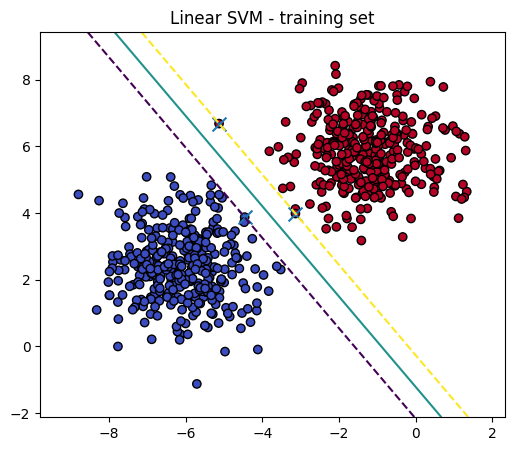

In [5]:
# C = 100
# Creem dades sintètiques
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1, random_state=1234)

# Divisió de proves d'entrenament
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Linear SVM (soft margin)
clf_lin = svm.SVC(kernel='linear', C=100)
clf_lin.fit(X_train, y_train)
    
# Evaluem
y_pred = clf_lin.predict(X_test)
print('Linear SVM accuracy on test set:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

# Plot del límit de decisió
ax = plot_decision_boundary(clf_lin, X_train, y_train, title='Linear SVM - training set')
plt.show()

En aquest exercici ens demanàvem canviar el valor de C per veure que passava.
Notem que hem canviat el cluster_std=1, ja que així tenim les dues classes més separades i podem veure millor la situació.

La C és el paràmetre de regularització, el que s'encarrega de controlar l'amplada del marge i la penalització dels errors de classificació. Quan canviem els valors de la C notem: 

Quan la C és gran, el model s'ajusta més als punts i els classifica el millor que pot, això es reflecteix tenint el marge més estret, amb una frontera que separa molt bé les classes, i quan la C és petita, el marge és més ample i hi ha més tolerància a errors (hi ha més generalització), això ho veiem clarament, ja que amb C=0.01 hi ha punts que es troben a dins de les fronteres i l'amplada del marge és molt superior a la resta. 
En canvi quan C=1 notem que el marge s'ha fet més estret i tenim 5 vectors separables, i quan C=100, el model s'ajusta el màxim que pot i es veu que el marge és lleugerament més estret i agafa tres punts com a vectors de suport.

Llavors la rigidesa de la frontera, i l'amplada del marge depèn de la C, si augmentéssim el cluster_std el problema seria més complex perquè les dades no serien tan separables, i ho podríem notar encara més.

## Exercici 2: Compara Kernels

Entrena SVMs amb tres kernels diferents: lineal, polinomial (grau = 3) i RBF. Utilitza C = 1. Visualitza els límits de decisió i compara les precisions de les proves.

Linear SVM accuracy on test set: 0.9966666666666667

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       154
           1       0.99      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



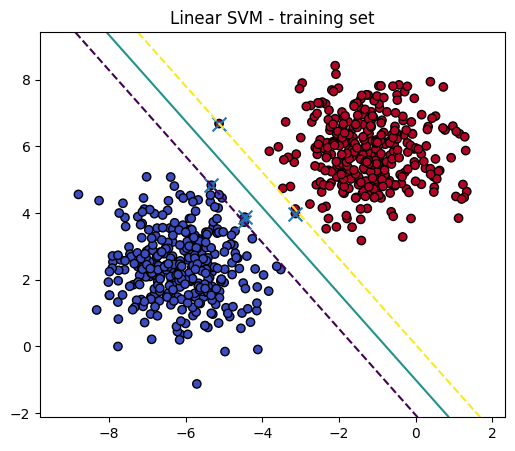

In [6]:
# Kernel Lineal
# Creem dades sintètiques
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1, random_state=1234)

# Divisió de proves d'entrenament
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Linear SVM (soft margin)
clf_lin = svm.SVC(kernel='linear', C=1)
clf_lin.fit(X_train, y_train)
    
# Evaluem
y_pred = clf_lin.predict(X_test)
print('Linear SVM accuracy on test set:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

# Plot del límit de decisió
ax = plot_decision_boundary(clf_lin, X_train, y_train, title='Linear SVM - training set')
plt.show()

Polynomial SVM accuracy on test set: 0.9966666666666667

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       154
           1       0.99      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



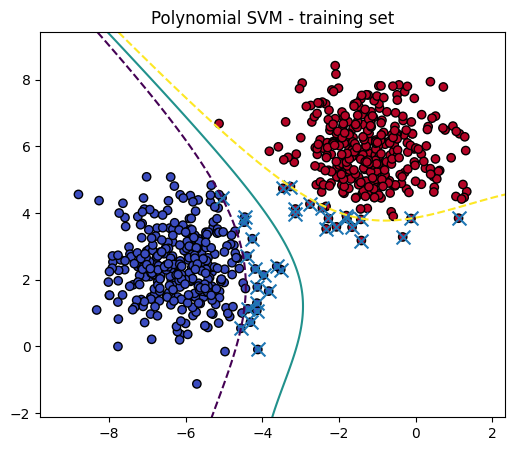

In [7]:
# Kernel Polinomial
# Creem dades sintètiques
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1, random_state=1234)

# Divisió de proves d'entrenament
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Linear SVM (soft margin)
clf_poly = svm.SVC(kernel='poly', degree=3, C=1)
clf_poly.fit(X_train, y_train)
    
# Evaluem
y_pred = clf_poly.predict(X_test)
print('Polynomial SVM accuracy on test set:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

# Plot del límit de decisió
ax = plot_decision_boundary(clf_poly, X_train, y_train, title='Polynomial SVM - training set')
plt.show()

RBF SVM accuracy on test set: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



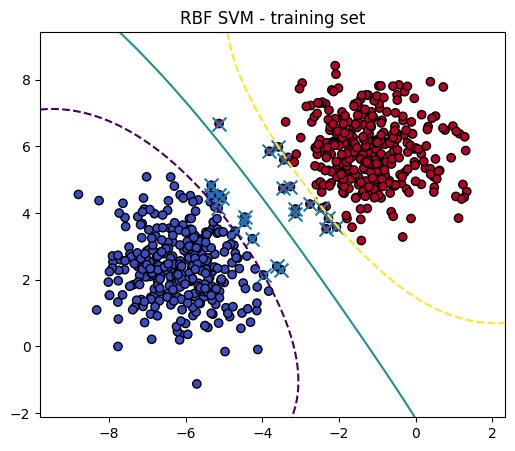

In [8]:
# RBF SVM
clf_rbf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
clf_rbf.fit(X_train, y_train)

y_pred_rbf = clf_rbf.predict(X_test)
print('RBF SVM accuracy on test set:', accuracy_score(y_test, y_pred_rbf))
print('\nClassification report:\n', classification_report(y_test, y_pred_rbf))

ax = plot_decision_boundary(clf_rbf, X_train, y_train, title='RBF SVM - training set')
plt.show()

En aquest exercici havíem d'estudiar el SVM amb tres kernels diferents, mantenint C=1, per veure com varien els límits de decisió i la precisió.

El Kernel lineal crea una frontera recta, és útil quan les classes són separables de manera lineal.
El kernel polinòmic com és de grau 3 s'adapta a separacions més corbes.
El kernel RBF és el més flexible, és per separacions complexes i té un paràmetre gamma que controla la precisió.

En el nostre cas podem veure clarament les diferents fronteres que fa cada model, i el RBF és el que fa els límits de decisió més flexibles.
En el cas del lineal, ho separa de manera senzilla amb una precisió del 0.997 i en el cas del polinòmic, tot i que veiem que els límits de decisió són més corbes i més flexibles, segueix donant una precisió similar (0.997), ara bé, en el cas del nucli RBF notem que tenim una precisió del 100%, és el que aconsegueix els límits de decisió més òptims.

Tot i així, en aquesta situació, els tres nuclis aconsegueixen una precisió similar i molt bona, això es degut a que les classes són fàcilment separables, però si en tinguessim altres punts d'entrenament on no es poguessin separar amb una línia recta veuríem com el polinòmic i el gaussià s'ajusten més.

Per tant, en aquest model no hi ha grans diferències de precisió, però podem veure com es comporta cada kernel i els seus límits de decisió.

## Exercici 3: Visualitzar vectors de suport i marges

Per a la SVM lineal entrenada amb C=1, visualitzeu els vectors de suport i escriviu quants vectors de suport hi ha per classe. 
A continuació, calculeu els valors del marge funcional f(x_i) per als punts d'entrenament i mostreu una petita taula dels 10 punts més propers.

Linear SVM accuracy on test set: 0.9966666666666667

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       154
           1       0.99      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



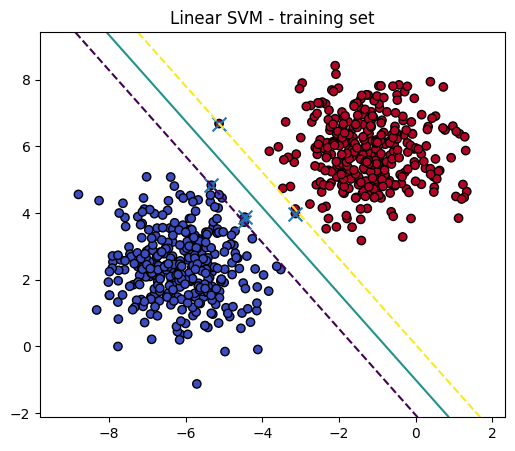

In [9]:
# Kernel Lineal
# Creem dades sintètiques
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1, random_state=1234)

# Divisió de proves d'entrenament
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Linear SVM (soft margin)
clf_lin = svm.SVC(kernel='linear', C=1)
clf_lin.fit(X_train, y_train)
    
# Evaluem
y_pred = clf_lin.predict(X_test)
print('Linear SVM accuracy on test set:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

# Plot del límit de decisió
ax = plot_decision_boundary(clf_lin, X_train, y_train, title='Linear SVM - training set')
plt.show()

In [10]:
#Per veure les coordenades dels 5 vectors de suport
clf_lin.support_vectors_

array([[-4.458185  ,  3.87756251],
       [-5.32793628,  4.83313594],
       [-4.47015206,  3.72501265],
       [-5.12634363,  6.68164205],
       [-3.13494958,  3.98532028]])

In [11]:
#Per veure quants hi ha de cada classe (3 blaus (classe 0) i 2 vermells (classe 1))
clf_lin.n_support_

array([3, 2], dtype=int32)

In [12]:
#Per veure quins dels 1000 punts són els vectors de suport (l'índex)
clf_lin.support_

array([291, 486, 660, 244, 499], dtype=int32)

In [13]:
#Ara per cada punt d'entrenament s'ha de calcular f(x_i), ho farem amb la funció: clf_lin.decision_function(X_train)
#No executo la funció perquè sino sortirà el valor dels 1000 punts d'entrenament

#El signe del valor que retorna indica la classe, si és positiu serà d'una classe i si és negatiu serà de l'altra
#Mostrarem una taula amb els 10 punts més propers, calculant la distància del punt a la frontera de decisió en valor absolut.

#Guardem els valors de cada f(x_i)
valors=clf_lin.decision_function(X_train)

#Ens interessa el valor absolut dels valors
distancia=abs(valors)

#Creem un dataframe
df= pd.DataFrame({
    'f(x_i)': valors,         # Valors del marge funcional
    '|f(x_i)|': distancia,    # La distància (els f(x_i) en valor absolut)
    'Classe': y_train         # Afegim la classe de cada punt
    })

#Ordenem la taula per la columna de la distància, de petit a gran
df_taula=df.sort_values(by='|f(x_i)|', ascending=True)

#Imprimim una taula amb els primers 10 punts
print('\n Els 10 punts més propers:')
print(df_taula.head(10))



 Els 10 punts més propers:
       f(x_i)  |f(x_i)|  Classe
291 -0.840195  0.840195       0
499  0.884068  0.884068       1
660 -0.999523  0.999523       0
244  0.999760  0.999760       1
486 -1.000236  1.000236       0
310  1.013070  1.013070       1
414 -1.015778  1.015778       0
634 -1.020811  1.020811       0
0   -1.177511  1.177511       0
537  1.196237  1.196237       1


En aquest exercici es demanava visualitzar els vectors de suport i veure quants n'hi havia per classe, en el nostre cas eren 5 vectors de suport, tres d'una classe (0) i dos de l'altra (1).
A més, l'índex de cada vector de suport x_i és: índex = 291, 486, 660, 244, 499. (respecte als 1000 punts d'entrenament que hi ha).

A continuació s'ha calculat els valors del marge funcional per a cada punt d'entrenament: f(x_i)=w·x_i+b amb la funció clf_lin.decision_function(X_train). 
El signe de cada f(x_i) indica de quina classe és, és a dir, si estarà en una banda o en l'altre de l'hiperplà.
Després, s'ha creat un dataframe amb aquests valors, la seva classe i la distància (f(x_i) en valor absolut) de cada punt.
Finalment, s'ha ordenat el dataframe segons la distància dels valors de menor a major per imprimir una taula dels 10 punts més propers al marge.

En la taula podem veure quins són, tenim 6 d'una classe (0) i 4 de l'altra (1), i si ens fixem, els vectors de suport són els 5 primers d'aquesta taula, cosa totalment esperable, ja que són els que defineixen les línies de decisió i el marge.

## Exercici 4 Conjunt de dades real: classificació del càncer de mama amb SVM

Utilitza el conjunt de dades load_breast_cancer() de scikit-learn. Entrena una SVM amb un kernel RBF. Utilitza una cerca simple en quadrícula per a C i gamma (quadrícula petita). Informa dels millors paràmetres i prova la precisió. Mostra la matriu de confusió i l'informe de classificació.

Best params: {'C': 1, 'gamma': 0.01}
RBF SVM accuracy on test set: 0.935672514619883

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91        66
           1       0.91      0.99      0.95       105

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171


Confusion matrix:
 [[ 56  10]
 [  1 104]]


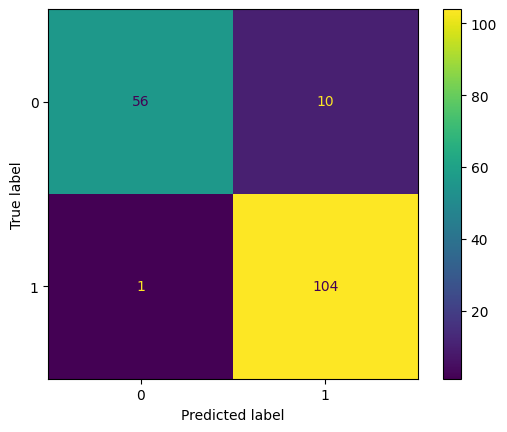

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay 

data = load_breast_cancer()
X_bc = data.data
y_bc = data.target

# Divisió de proves d'entrenament
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bc, y_bc, test_size=0.3, random_state=1234)

#Normalitzem les dades
scaler = StandardScaler()
Xb_train_s = scaler.fit_transform(Xb_train)
Xb_test_s = scaler.transform(Xb_test)

#Fem el model amb el RBF
clf = svm.SVC(kernel='rbf')

#Per combinar els diferents valors de C i de gamma en el model
param_grid = {'C':[0.1, 1, 10], 'gamma':['scale', 0.01, 0.1]}

#Agafem el model clf i el provem amb tots els paràmetres de C i gamma
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(Xb_train_s, yb_train)

#Volem que mostri els millors paràmetres i la seva precisió:
print('Best params:', grid.best_params_)   # Mostra la millor combinació de C i gamma
best = grid.best_estimator_                # Guardem el millor model

#Test accuracy amb el millor model trobat
yb_pred = best.predict(Xb_test_s)
print('RBF SVM accuracy on test set:', f''accuracy_score(yb_test, yb_pred):.4f})

#Volem que mostri l'informe de classificació
print('\nClassification report:\n', classification_report(yb_test, yb_pred))

#Volem que mostri la matriu de confusió
print('\nConfusion matrix:\n', confusion_matrix(yb_test, yb_pred))

#Com a extra, visualitzem la matriu (s'ha hagut d'importar ConfusionMatrixDisplay)
cm = confusion_matrix(yb_test, yb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

En aquest exercici es demanava utilitzar un conjunt de dades del càncer de mama, que conté informació per determinar si un tumor és maligne o benigne. S'ha entrenat una SVM amb el nucli gaussià, però en comptes d'imposar uns valors a la C i a la gamma, s'ha fet de manera que provi tres combinacions de C i tres de gamma. I de les 9 combinacions possibles, s'ha guardat la millor combinació i hem fet que digui per pantalla els valors dels paràmetres de la millor combinació i la precisió.
Ens ha sortit que la millor combinació és C=1 i la gamma= 0.01, això passa perquè quan la gamma és petita, les fronteres són més flexibles, i a més alta, més complexes i ajustades (pot haver-hi risc de overfitting). Per això és coherent que la millor opció sigui la més petita. De la C tot i que a la teoria a més gran, més ajustada és la frontera, la realitat és la C=1 ha estat un bon equilibri entre precisió i flexibilitat.
La precisió ha estat del 0.936 aproximadament.

Després s'ha imprès l'informe de classificació i la matriu de confusió, i a més hem afegit la visualització d'aquesta, per a una millor representació.
El que estem veient és que s'han classificat correctament 56 tumors benignes (classe 0) i 104 tumors malignes (classe 1), però hi ha 10 benignes que els ha classificat com a malignes, i 1 tumor maligne classificat com a benigne. És per això que a l'informe de classificació veiem una precisió de 0.98 i un recall del 0.85 (en la classe 0), perquè alguns de classe 0 han quedat mal classificats, però això no és un error tan greu com si fos al contrari.
El model mostra un recall molt alt per a la classe maligna, cosa important en diagnòstics mèdics, ja que implica que pràcticament tots els casos de càncer són detectats.
Per tant, aquest model amb aquests paràmetres aconsegueix una molt bona precisió i és un model molt fiable per a la detecció de tumors malignes.

## Exercici 5: Conjunt de dades real: classificació del càncer de mama amb regressió logística

Utilitzeu el conjunt de dades load_breast_cancer() de scikit-learn. Ajusteu un model de regressió logística i compareu-ne el rendiment amb el SVM de l'exercici 4. Informeu de la precisió de la prova, la matriu de confusió i l'informe de classificació.

Regressió logística accuracy on test set: 0.9473684210526315

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        66
           1       0.92      1.00      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171


Confusion matrix:
 [[ 57   9]
 [  0 105]]


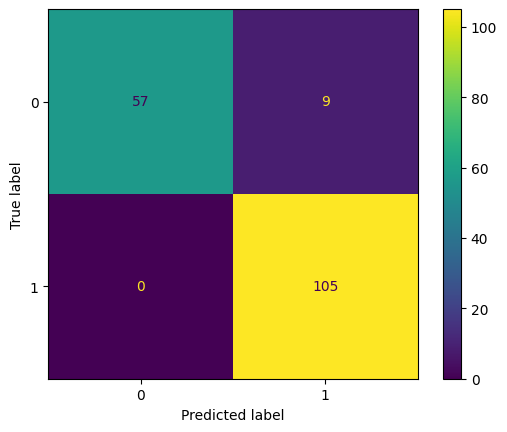

In [15]:
#Importem el model de regressió logística
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

#Cridem al model amb les dades ya normalitzades d'abans
Rlog = LogisticRegression(random_state=1234)
Rlog.fit(Xb_train_s, yb_train)

#Imprimim tota la informació demanada
yb_predRL = Rlog.predict(Xb_test_s)
print('Regressió logística accuracy on test set:', accuracy_score(yb_test, yb_predRL))
print('\nClassification report:\n', classification_report(yb_test, yb_predRL))
print('\nConfusion matrix:\n', confusion_matrix(yb_test, yb_predRL))

#Fem una matriu visual per ajudar-nos.
cm2 = confusion_matrix(yb_test, yb_predRL)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()


En aquest exercici s'havia d'usar el model de Regressió logística i comparar amb l'anterior.
He importat el model i he cridat a la funció usant les dades ja normalitzades d'abans, després li he demanat que escrigui per pantalla tota la informació demanada.

El que trobem és que aquí ha millorat lleugerament els resultats respecte l'exercici anterior, ara tenim una precisió del 94,7%.
Ha aconseguit classificar correctament els 105 tumors malignes i dels benignes, 57 estan ben classificats i 9 no (falsos positius). Tot i ser un model més senzill que el SVM, ha tingut millors resultats, ha detectat correctament tots els malignes.

Això podria ser perquè en aquest cas les dades són fàcilment separables de manera lineal, per tant, quan estem treballant amb dades així, millor provar regressió logística.

Els dos models s'utilitzen per a la classificació binària, però la regressió logística és millor usar-la si tenim certesa que les dades es poden separar linealment, en cas contrari, ja si seria convenient usar SVM amb kernels no lineals on la separació entre classes és més complexa.

Tot i així ja veiem que en aquest exemple la diferència de rendiment és molt petita, però la regressió logística ha estat més eficient.
